In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

!pip install sweetviz
import sweetviz as sv

     |████████████████████████████████| 15.1 MB 19.3 MB/s 


In [ ]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/niranjana1997/ISTE-782-VAST-Challenge-2019-MC1/main/dataset/mc1-reports-data.csv', header=[0], sep=',')

In [ ]:
# To display the top 5 rows
df.head(5)

,time,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
0,08-04-2020 17:50,10.0,6,10,3.0,8.0,NaN,1
1,09-04-2020 13:50,2.0,10,0,8.0,4.0,0.0,1
2,09-04-2020 00:20,7.0,10,10,9.0,10.0,0.0,1
3,08-04-2020 17:25,1.0,1,2,10.0,7.0,NaN,1
4,08-04-2020 02:50,9.0,7,1,6.0,9.0,NaN,1


# **Basic Data Exploration**

In [ ]:
# Summary Statistics
print("Summary Statistics: ")
df.describe()

Summary Statistics: 


,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
count,82899.000000,83070.000000,83070.000000,35629.000000,82900.000000,70926.000000,83070.000000
mean,5.649139,6.045371,5.743289,5.322687,4.744005,2.682641,8.978488
std,2.787791,2.851951,2.506399,2.527679,2.256358,1.935366,5.123608
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,4.000000,4.000000,4.000000,3.000000,1.000000,4.000000
50%,6.000000,7.000000,6.000000,6.000000,5.000000,2.000000,8.000000
75%,8.000000,8.000000,7.000000,7.000000,6.000000,4.000000,14.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,19.000000


In [ ]:
# Checking the data type
print("Data types: ")
df.dtypes

Data types: 


time                  object
sewer_and_water      float64
power                  int64
roads_and_bridges      int64
medical              float64
buildings            float64
shake_intensity      float64
location               int64
dtype: object

In [ ]:
# Total number of rows and columns
print("(Rows, Columns): ", df.shape)

(Rows, Columns):  (83070, 8)


In [ ]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

print() 

# Dropping Duplicates
df.drop_duplicates(inplace=True)

# Used to count the number of rows after dropping duplicates
print("Count of number of rows after dropping duplicates:")
print(df.count())

Number of duplicate rows:  (18846, 8)

Count of number of rows after dropping duplicates:
time                 64224
sewer_and_water      64068
power                64224
roads_and_bridges    64224
medical              26104
buildings            64069
shake_intensity      52287
location             64224
dtype: int64


Total Number of Null Values
time                     0
sewer_and_water        156
power                    0
roads_and_bridges        0
medical              38120
buildings              155
shake_intensity      11937
location                 0
dtype: int64

Percentage of missing values
time                  0.000000
sewer_and_water       0.242900
power                 0.000000
roads_and_bridges     0.000000
medical              59.354758
buildings             0.241343
shake_intensity      18.586510
location              0.000000
dtype: float64



Text(0.5, 1.0, 'Missing values')

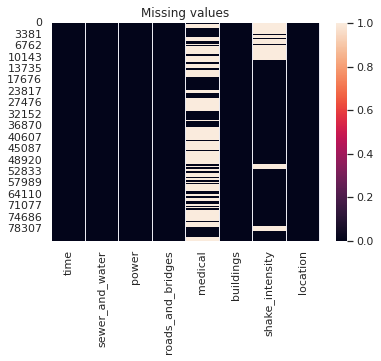

In [ ]:
# Finding the null values.
print("Total Number of Null Values")
print(df.isnull().sum())

print()

#Check the percentages of missing value
print("Percentage of missing values")
print(df.isnull().sum() / df.shape[0] * 100)

print()

# Checking for missing data using the seaborn's heatmap 
sns.heatmap(df.isnull()).set_title("Missing values")

# Inference:
# 1. 'Medical' column - 59% of the data is missing
# 2. 'Shake Intensity' column - 18% of the data is missing

Boxplots

Text(0.5, 1.0, 'shake_intensity')

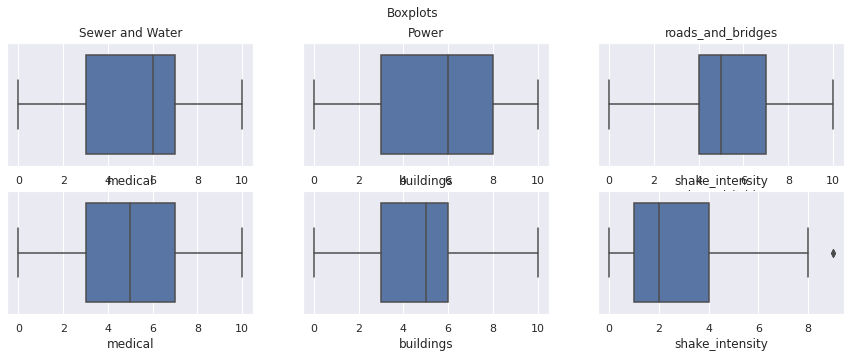

In [ ]:
# Subplots of boxplots of each category
fig, axes = plt.subplots(2, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Boxplots')

# Sewer and Water
sns.boxplot(ax=axes[0,0], x=df['sewer_and_water'])
axes[0,0].set_title("Sewer and Water")

# Power
sns.boxplot(ax = axes[0,1], x=df['power'])
axes[0,1].set_title("Power")

# Roads and Bridges
sns.boxplot(ax = axes[0,2], x=df['roads_and_bridges'])
axes[0,2].set_title("roads_and_bridges")

# Medical
sns.boxplot(ax = axes[1,0], x=df['medical'])
axes[1,0].set_title("medical")

# Buildings
sns.boxplot(ax = axes[1,1], x=df['buildings'])
axes[1,1].set_title("buildings")

# Shake Intensity
sns.boxplot(ax = axes[1,2], x=df['shake_intensity'])
axes[1,2].set_title("shake_intensity")

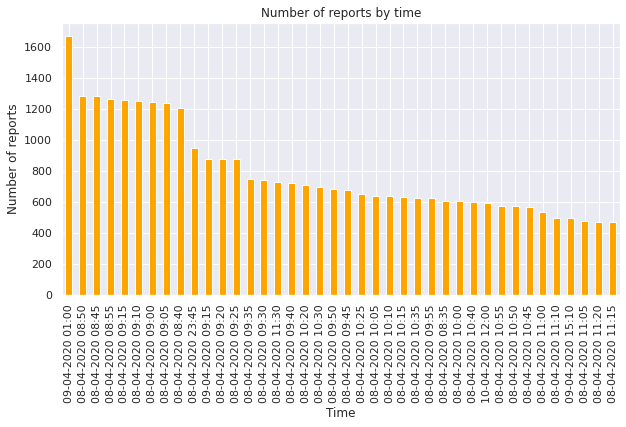

In [ ]:
# Plotting a Histogram - Count of Reports with time
df.time.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color='orange')
plt.title('Number of reports by time')
plt.ylabel('Number of reports')
plt.xlabel('Time');

# Inference: 
# 1. Most number of reports were on 9th April, 2020 at 01:00
# 2. 8th April, 9th April and 10th April were the days that reported the most.

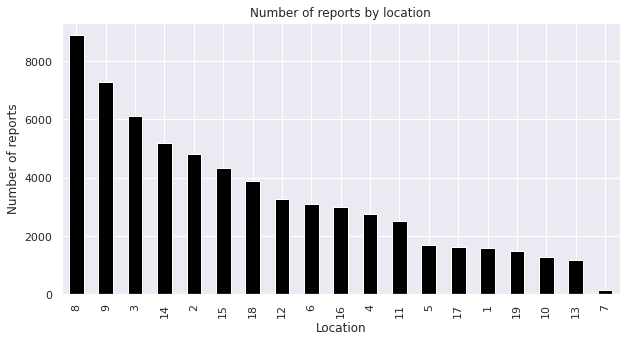

In [ ]:
# Plotting a Histogram - Count of Reports with location
df.location.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color='black')
plt.title('Number of reports by location')
plt.ylabel('Number of reports')
plt.xlabel('Location');

# Inference
# 1. Location 8 and Location 3 has most number of reports

,sewer_and_water,power,roads_and_bridges,medical,buildings,shake_intensity,location
sewer_and_water,1.000000,0.412242,0.517856,0.404050,0.488662,0.016585,-0.163763
power,0.412242,1.000000,0.504050,0.473640,0.413643,0.271468,-0.106917
roads_and_bridges,0.517856,0.504050,1.000000,0.474626,0.421836,0.026631,-0.153603
medical,0.404050,0.473640,0.474626,1.000000,0.426151,0.485277,-0.247736
buildings,0.488662,0.413643,0.421836,0.426151,1.000000,0.032014,-0.015340
shake_intensity,0.016585,0.271468,0.026631,0.485277,0.032014,1.000000,-0.010080
location,-0.163763,-0.106917,-0.153603,-0.247736,-0.015340,-0.010080,1.000000


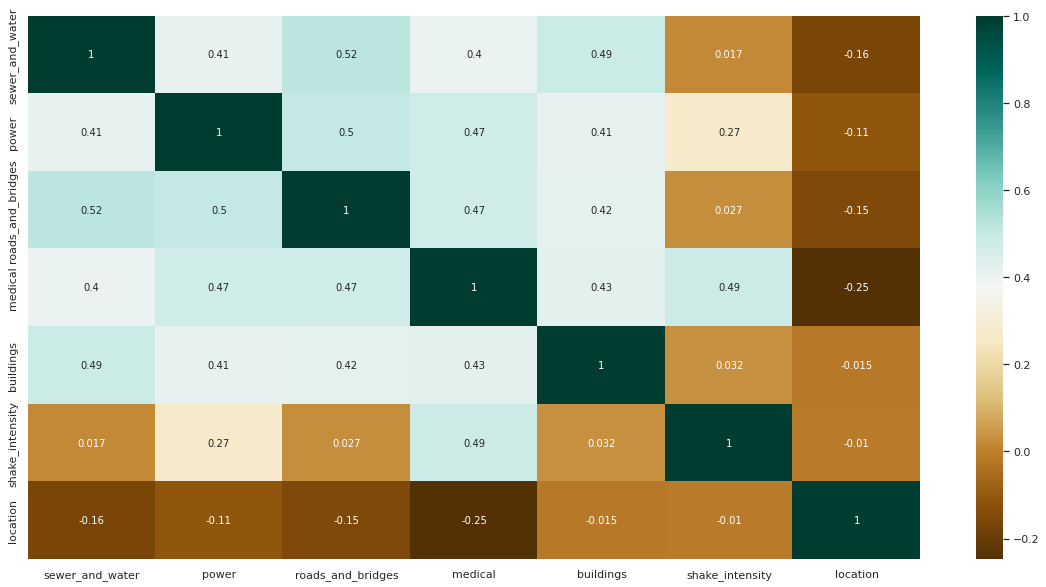

In [ ]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(correlation, cmap="BrBG", annot=True)
correlation

# Inference:
# 1. 'Roads and Bridges' and 'Sewer and Water' has the highest correlation (0.62)
# 2. 'Medical' and 'Location' has the least correlation (-0.37)

In [ ]:
my_report = sv.analyze([df, "Train"])
my_report.show_html('Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
